<a href="https://colab.research.google.com/github/jimmy-pink/colab-playground/blob/main/coursera/nlp-word_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  A poetry generator.

<a href="https://www.coursera.org/learn/natural-language-processing-tensorflow/lecture/SIKZE/example" target="_parent"><img src="https://raw.githubusercontent.com/jimmy-pink/colab-playground/main/resources/icon/coursera.svg" alt="Open In Coursera"/></a>  

从简到繁，演示文本生成模型的训练和进化过程。


### 非常简单的文本预测

#### 问题分析

在CV中，训练神经网络来分类像素，它会预测图像内容，比如可能是时尚单品或手写体。  
文本预测与此非常相似。我们可以获取一段文本，从中提取完整的词汇表，然后从这些词汇表中创建数据集。  
其中短语作为x，短语中的下一个词作为y。  
- 例如，考虑短语“twinkle twinkle little star”。  
如果我们创建训练数据，其中x是“twinkle twinkle little”，y是“star”。  
- 那么每当神经网络看到“twinkle twinkle little”时，预测的下一个词就是“star”。

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
# Define the lyrics of the song
data = "In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

# Split the long string per line and put in a list
corpus = data.lower().split("\n")

# Preview the result
print(len(corpus))

64


#### 文本向量化

In [ ]:
# 将每个单词转成一个对应的数值
vectorize_layer = tf.keras.layers.TextVectorization()
vectorize_layer.adapt(corpus)

In [ ]:
vocabulary = vectorize_layer.get_vocabulary()
vocab_size = len(vocabulary)

print(f'{vocab_size}')

264


In [ ]:
sample = vectorize_layer(corpus[0])
print(corpus[0])
print(sample)

in the town of athy one jeremy lanigan 
tf.Tensor([  5   3  83   9 255 140 183 174], shape=(8,), dtype=int64)


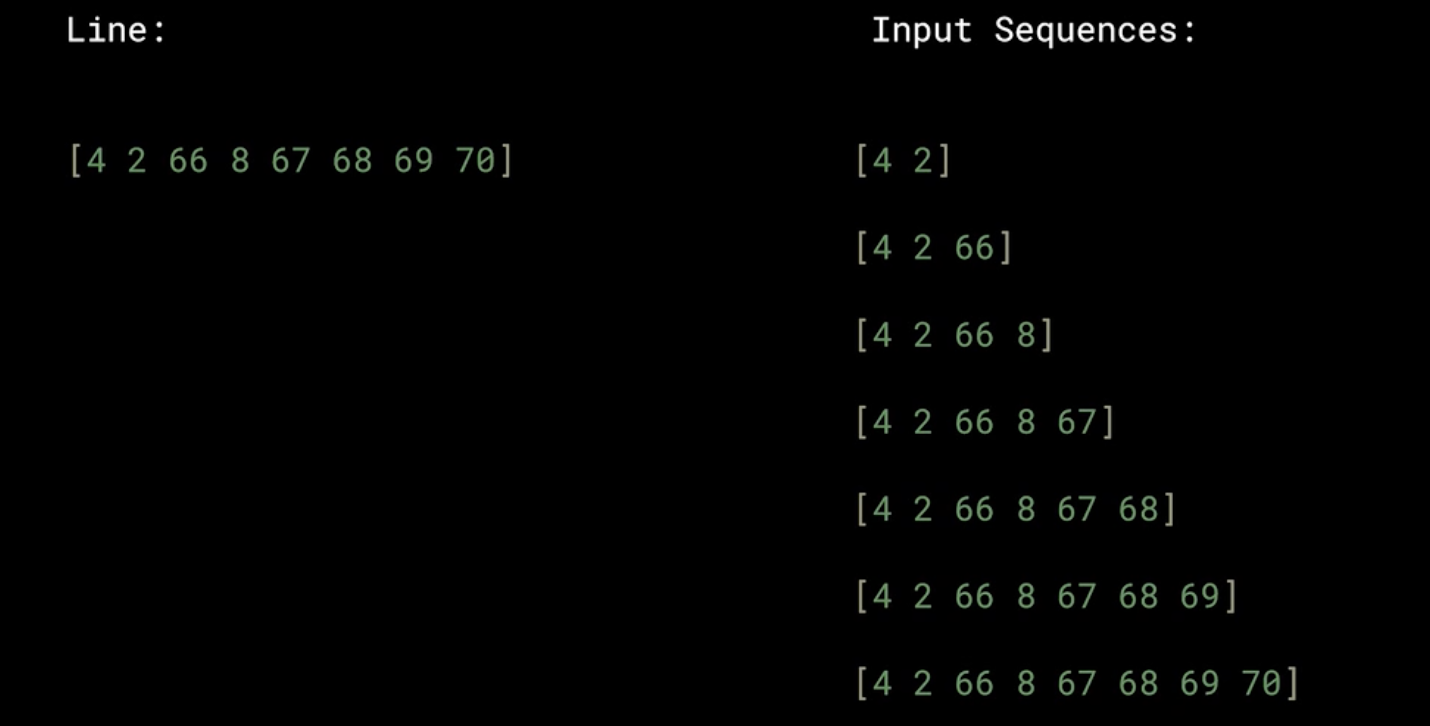

In [ ]:
input_sequences = []

# Loop over every line
for line in corpus:
	sequence = vectorize_layer(line).numpy()
	for i in range(1, len(sequence)):
		n_gram_sequence = sequence[:i+1]
		input_sequences.append(n_gram_sequence)
print(len(corpus), len(input_sequences), input_sequences[0], input_sequences[1], input_sequences[2], input_sequences[3])

64 453 [5 3] [ 5  3 83] [ 5  3 83  9] [  5   3  83   9 255]


In [ ]:
max_sequence_len = max([len(x) for x in input_sequences])
print(max_sequence_len)
# Pad all sequences
input_sequences = np.array(tf.keras.utils.pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)
print(xs[0], labels[0]) # in 可以预测下一个是 the
print(xs[1], labels[1]) # in the 预测下一个word是 town
print(xs[2], labels[2]) # in the town 预测下一个word是 of

11
[0 0 0 0 0 0 0 0 0 5] 3
[0 0 0 0 0 0 0 0 5 3] 83
[ 0  0  0  0  0  0  0  5  3 83] 9


In [ ]:
print(len(xs), len(ys), len(ys[0]))

453 453 264


#### 文本与序列互转

text-to-sequence 查看单词在词汇表中的下标

In [ ]:
sentence = corpus[0].split()
print(f'sample sentence: {sentence}')

# Initialize token list
token_list = []

# Look up the indices of each word and append to the list
for word in sentence:
  token_list.append(vocabulary.index(word))

# Print the token list
print(token_list)

sample sentence: ['in', 'the', 'town', 'of', 'athy', 'one', 'jeremy', 'lanigan']
[5, 3, 83, 9, 255, 140, 183, 174]


sequence-to-text

In [ ]:
def sequence_to_text(sequence, vocabulary):
  words = [vocabulary[index] for index in sequence]
  text = tf.strings.reduce_join(words, separator=' ').numpy().decode()
  return text

In [ ]:
print(sequence_to_text([5, 3, 83, 9, 255, 140, 183, 174], vocabulary))

in the town of athy one jeremy lanigan


In [ ]:
elem_number = 6
# 输入： in the town of athy one jeremy
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {sequence_to_text(xs[elem_number], vocabulary)}')
# 目标变量值：lanigan
print(f'one-hot label: {ys[elem_number]}')
# np.argmax 返回数列最大值
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [  0   0   0   5   3  83   9 255 140 183]
decoded to text:    in the town of athy one jeremy
one-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
index of label: 174


#### 建模

In [ ]:
model = tf.keras.models.Sequential([
            tf.keras.Input(shape=(max_sequence_len-1,)),
            tf.keras.layers.Embedding(vocab_size, 64),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
            tf.keras.layers.Dense(vocab_size, activation='softmax')
])

# Use categorical crossentropy because this is a multi-class problem
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 10, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 40)             │        13,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 264)            │        10,824 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,320 (161.41 KB)

 Trainable params: 41,320 (161.41 KB)

 Non-trainable params: 0 (0.00 B)

#### 训练评估

In [ ]:
history = model.fit(xs, ys, epochs=500)

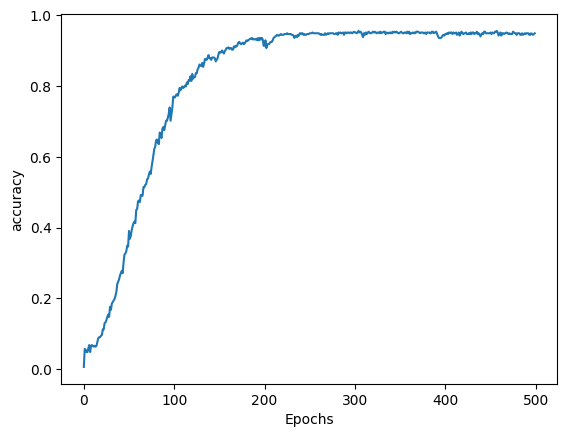

In [ ]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

#### 预测

In [ ]:
seed_text = "Laurence went to Dublin"

# Define total words to predict
next_words = 100

# Loop until desired length is reached
for _ in range(next_words):

	# Convert the seed text to an integer sequence
	sequence = vectorize_layer(seed_text)

	# Pad the sequence
	sequence = tf.keras.utils.pad_sequences([sequence], maxlen=max_sequence_len-1, padding='pre')

	# Feed to the model and get the probabilities for each index
	probabilities = model.predict(sequence, verbose=0)

	# Get the index with the highest probability
	predicted = np.argmax(probabilities, axis=-1)[0]

	# Ignore if index is 0 because that is just the padding.
	if predicted != 0:

		# Look up the word associated with the index.
		output_word = vocabulary[predicted]

		# Combine with the seed text
		seed_text += " " + output_word

# Print the result
print(seed_text)

Laurence went to Dublin bees round a cask cask cask mchugh wall forget mchugh murther murther murther again entangled ask nelly might make eyes glisten glisten glisten glisten glisten wall forget glisten glisten wall me a cask ask ask wall groups wine for by the wall glisten mchugh wall wall wall wall wall the make eyes man glisten water glisten wall wall forget glisten glisten nelly glisten ask entangled ask nelly nonsense invitation ask fainted relations again again again forget entangled ask entangled ask entangled ask entangled ask nelly make your eyes glisten glisten glisten mchugh mchugh mchugh wall wall forget glisten entangled ask


上面实现的文本生成器 非常蠢，因为它只有264个单词，在400多个参数上训练的。  

---

### 创作歌曲

In [2]:
!wget https://raw.githubusercontent.com/https-deeplearning-ai/tensorflow-1-public/refs/heads/main/C3/W4/misc/Laurences_generated_poetry.txt

--2025-05-05 13:33:38--  https://raw.githubusercontent.com/https-deeplearning-ai/tensorflow-1-public/refs/heads/main/C3/W4/misc/Laurences_generated_poetry.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69001 (67K) [text/plain]
Saving to: ‘Laurences_generated_poetry.txt’

Laurences_generated 100%[===================>]  67.38K  --.-KB/s    in 0.01s   

2025-05-05 13:33:38 (4.58 MB/s) - ‘Laurences_generated_poetry.txt’ saved [69001/69001]



In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Load the dataset
data = open('./Laurences_generated_poetry.txt').read()

# Lowercase and split the text
corpus = data.lower().split("\n")

# Preview the result
print(corpus[0])

come all ye maidens young and fair


In [6]:
# Initialize the vectorization layer
vectorize_layer = tf.keras.layers.TextVectorization()

# Build the vocabulary
vectorize_layer.adapt(corpus)

In [8]:
vocabulary = vectorize_layer.get_vocabulary()
vocab_size = len(vocabulary)

print(f'{vocab_size}')

2704


In [9]:
# Initialize the sequences list
input_sequences = []

# Loop over every line
for line in corpus:

	# Generate the integer sequence of the current line
	sequence = vectorize_layer(line).numpy()

	# Loop over the line several times to generate the subphrases
	for i in range(1, len(sequence)):

		# Generate the subphrase
		n_gram_sequence = sequence[:i+1]

		# Append the subphrase to the sequences list
		input_sequences.append(n_gram_sequence)

# Get the length of the longest line
max_sequence_len = max([len(x) for x in input_sequences])

# Pad all sequences
input_sequences = np.array(tf.keras.utils.pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create inputs and label by splitting the last token in the subphrases
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

# Convert the label into one-hot arrays
ys = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

In [10]:
# Get sample sentence
sentence = corpus[0].split()
print(f'sample sentence: {sentence}')

# Initialize token list
token_list = []

# Look up the indices of each word and append to the list
for word in sentence:
  token_list.append(vocabulary.index(word))

# Print the token list
print(token_list)

sample sentence: ['come', 'all', 'ye', 'maidens', 'young', 'and', 'fair']
[55, 13, 96, 1886, 49, 3, 71]


In [11]:
def sequence_to_text(sequence, vocabulary):
  '''utility to convert integer sequence back to text'''

  # Loop through the integer sequence and look up the word from the vocabulary
  words = [vocabulary[index] for index in sequence]

  # Combine the words into one sentence
  text = tf.strings.reduce_join(words, separator=' ').numpy().decode()

  return text

In [13]:
elem_number = 5

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {sequence_to_text(xs[elem_number], vocabulary)}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [   0    0    0    0    0    0    0    0    0   55   13   96 1886   49
    3]
decoded to text:          come all ye maidens young and
one-hot label: [0. 0. 0. ... 0. 0. 0.]
index of label: 71


In [12]:
elem_number = 4

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {sequence_to_text(xs[elem_number], vocabulary)}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [   0    0    0    0    0    0    0    0    0    0   55   13   96 1886
   49]
decoded to text:           come all ye maidens young
one-hot label: [0. 0. 0. ... 0. 0. 0.]
index of label: 3


In [14]:
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE
BATCH_SIZE = 32

# Put the inputs and labels to a tf.data.Dataset
dataset = tf.data.Dataset.from_tensor_slices((xs,ys))

# Optimize the dataset for training
dataset = dataset.cache().prefetch(PREFETCH_BUFFER_SIZE).batch(BATCH_SIZE)

In [15]:
embedding_dim = 100
lstm_units = 150
learning_rate = 0.01

# Build the model
model = tf.keras.models.Sequential([
            tf.keras.Input(shape=(max_sequence_len-1,)),
            tf.keras.layers.Embedding(vocab_size, embedding_dim),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_units)),
            tf.keras.layers.Dense(vocab_size, activation='softmax')
])

# Use categorical crossentropy because this is a multi-class problem
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=['accuracy']
    )

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 15, 100)        │       270,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 300)            │       301,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2704)           │       813,904 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,385,504 (5.29 MB)

 Trainable params: 1,385,504 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 100

# Train the model
history = model.fit(dataset, epochs=epochs)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 35s 79ms/step - accuracy: 0.0593 - loss: 6.8765
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 98ms/step - accuracy: 0.0822 - loss: 5.8673
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 77ms/step - accuracy: 0.1047 - loss: 5.7064
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 78ms/step - accuracy: 0.1255 - loss: 5.4330
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 79ms/step - accuracy: 0.1632 - loss: 4.8742
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 76ms/step - accuracy: 0.1763 - loss: 4.8074
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 76ms/step - accuracy: 0.2320 - loss: 3.9714
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - accuracy: 0.2846 - loss: 3.4524
Epoch 9/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 76ms/step - accuracy: 0.3266 - loss: 3.2042
Epoch 10/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.3698 - loss: 2.8491
Epoch 11/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 78ms/step - accuracy: 0.4114 - loss: 2.6050
Epoch 12/100
375/37

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

In [ ]:
seed_text = "help me obi-wan kenobi youre my only hope"

# Define total words to predict
next_words = 100

# Loop until desired length is reached
for _ in range(next_words):

	# Generate the integer sequence of the current line
	sequence = vectorize_layer(seed_text)

	# Pad the sequence
	sequence = tf.keras.utils.pad_sequences([sequence], maxlen=max_sequence_len-1, padding='pre')

	# Feed to the model and get the probabilities for each index
	probabilities = model.predict(sequence, verbose=0)

	# Get the index with the highest probability
	predicted = np.argmax(probabilities, axis=-1)[0]

	# Ignore if index is 0 because that is just the padding.
	if predicted != 0:

		# Look up the word associated with the index.
		output_word = vocabulary[predicted]

		# Combine with the seed text
		seed_text += " " + output_word

# Print the result
print(seed_text)

In [ ]:
seed_text = "help me obi-wan kenobi youre my only hope"

# Define total words to predict
next_words = 100

# Loop until desired length is reached
for _ in range(next_words):

	# Convert the seed text to an integer sequence
  sequence = vectorize_layer(seed_text)

	# Pad the sequence
  sequence = tf.keras.utils.pad_sequences([sequence], maxlen=max_sequence_len-1, padding='pre')

	# Feed to the model and get the probabilities for each index
  probabilities = model.predict(sequence, verbose=0)

  # Pick a random number from [1,2,3]
  choice = np.random.choice([1,2,3])

  # Sort the probabilities in ascending order
  # and get the random choice from the end of the array
  predicted = np.argsort(probabilities)[0][-choice]

	# Ignore if index is 0 because that is just the padding.
  if predicted != 0:

    # Look up the word associated with the index.
    output_word = vocabulary[predicted]

    # Combine with the seed text
    seed_text += " " + output_word

# Print the result
print(seed_text)

###  Text Generation with an RNN

In [ ]:
!wget https://raw.githubusercontent.com/brunoklein99/deep-learning-notes/refs/heads/master/shakespeare.txt

In [ ]:
import tensorflow as tf

import numpy as np
import os
import time

path_to_file = f'./shakespeare.txt'
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
vocab = sorted(set(text))

ids_from_chars = tf.keras.layers.StringLookup(
    vocabulary=list(vocab), mask_token=None)

ids = ids_from_chars(chars)

chars_from_ids = tf.keras.layers.StringLookup(
    vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)

chars = chars_from_ids(ids)

tf.strings.reduce_join(chars, axis=-1).numpy()

def text_from_ids(ids):
  return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

all_ids = ids_from_chars(tf.strings.unicode_split(text, 'UTF-8'))
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)

seq_length = 100
sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)

def split_input_target(sequence):
    input_text = sequence[:-1]
    target_text = sequence[1:]
    return input_text, target_text


split_input_target(list("Tensorflow"))

dataset_split = sequences.map(split_input_target)

BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = (
    dataset_split
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .cache()
    .prefetch(tf.data.AUTOTUNE))


vocab_size = len(ids_from_chars.get_vocabulary())

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.GRU(rnn_units, return_sequences=True),
    tf.keras.layers.Dense(vocab_size)
])

model.summary()

model.compile(optimizer='adam', loss=loss, metrics=['sparse_categorical_accuracy'])

class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars

    # Create a mask to prevent "[UNK]" from being generated.
    skip_ids = self.ids_from_chars(['[UNK]'])[:, None]
    sparse_mask = tf.SparseTensor(
        # Put a -inf at each bad index.
        values=[-float('inf')]*len(skip_ids),
        indices=skip_ids,
        # Match the shape to the vocabulary
        dense_shape=[len(ids_from_chars.get_vocabulary())])
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)

  @tf.function
  def generate_one_step(self, inputs, states=None):
    # Convert strings to token IDs.
    input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
    input_ids = self.ids_from_chars(input_chars).to_tensor()

    # Embedding layer
    x = self.model.layers[0](input_ids)
    # GRU layer
    x = self.model.layers[1](x, initial_state=states)
    # Get the hidden state of the last timestep
    states = x[:, -1, :]
    # Dense layer
    predicted_logits = self.model.layers[2](x)

    # Only use the last prediction.
    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature

    # Apply the prediction mask: prevent "[UNK]" from being generated.
    predicted_logits = predicted_logits + self.prediction_mask

    # # Sample the output logits to generate token IDs.
    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)

    # # Convert from token ids to characters
    predicted_chars = self.chars_from_ids(predicted_ids)

    # Return the characters and model state.
    return predicted_chars, states


one_step_model = OneStep(model, chars_from_ids, ids_from_chars)
start = time.time()
states = None
next_char = tf.constant(['ROMEO:'])
result = [next_char]

for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)

result = tf.strings.join(result)
end = time.time()
print(result[0].numpy().decode('utf-8'), '\n\n' + '_'*80)
print('\nRun time:', end - start)